<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/DecisionTree_RandomForest_Regression/blob/main/RFR_Energy_Efficiency_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Efficiency Dataset

## About Dataset

Source: The dataset was created by Angeliki Xifara

**Data Set Information:**

- We perform energy analysis using 12 different building shapes simulated in Ecotect.

- The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters.

- We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes.

- The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.

- It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**

The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2).

The aim is to use the eight features to predict each of the two responses.

**Specifically:**
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
## reading csv file
data = pd.read_csv('/content/ENB2012_data.csv')
print(f"data shape : {data.shape}")
data.sample(1)

data shape : (768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
118,0.76,661.5,416.5,122.5,7.0,4,0.1,2,33.12,34.17


In [3]:
## cloumns list:
columms_head_list = ['Relative_Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

## making it dictionart
col_dict = dict(zip(data.columns,columms_head_list))

# Rename the columns
data = data.rename(columns = col_dict)

## printing
data.sample(3)


,Relative_Compactness,Surface Area,Wall Area,Roof Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
356,0.76,661.5,416.5,122.5,7.0,2,0.25,2,36.95,36.87
527,0.62,808.5,367.5,220.5,3.5,5,0.25,5,13.86,14.75
100,0.90,563.5,318.5,122.5,7.0,2,0.10,2,28.88,32.54


In [4]:
### checking the null values
print(f"\n null values:\n {data.isnull().sum()}\n")

## checking the sample:
print(f"\ndata_shape\n: {data.shape}\n")


## checking duplicated values:
print(f"duplicated values: {data.duplicated().sum()}\n")

# checking the info
data.info()


 null values:
 Relative_Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


data_shape
: (768, 10)

duplicated values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7  

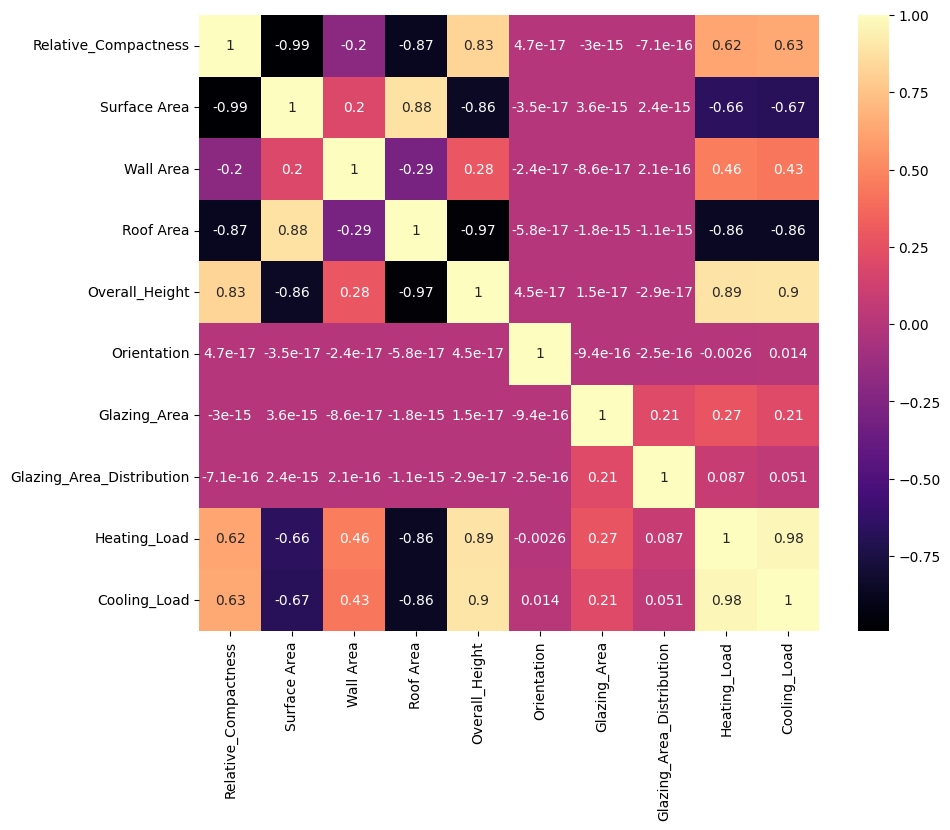

In [5]:
##plotting heatmap:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='magma',annot=True);


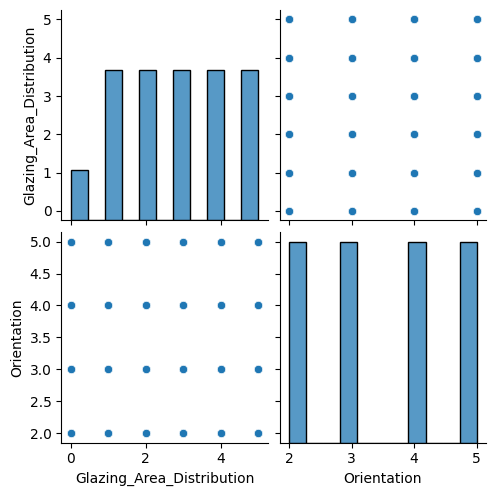

In [6]:
# Create a pair plot
sns.pairplot(data[['Glazing_Area_Distribution', 'Orientation']])

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


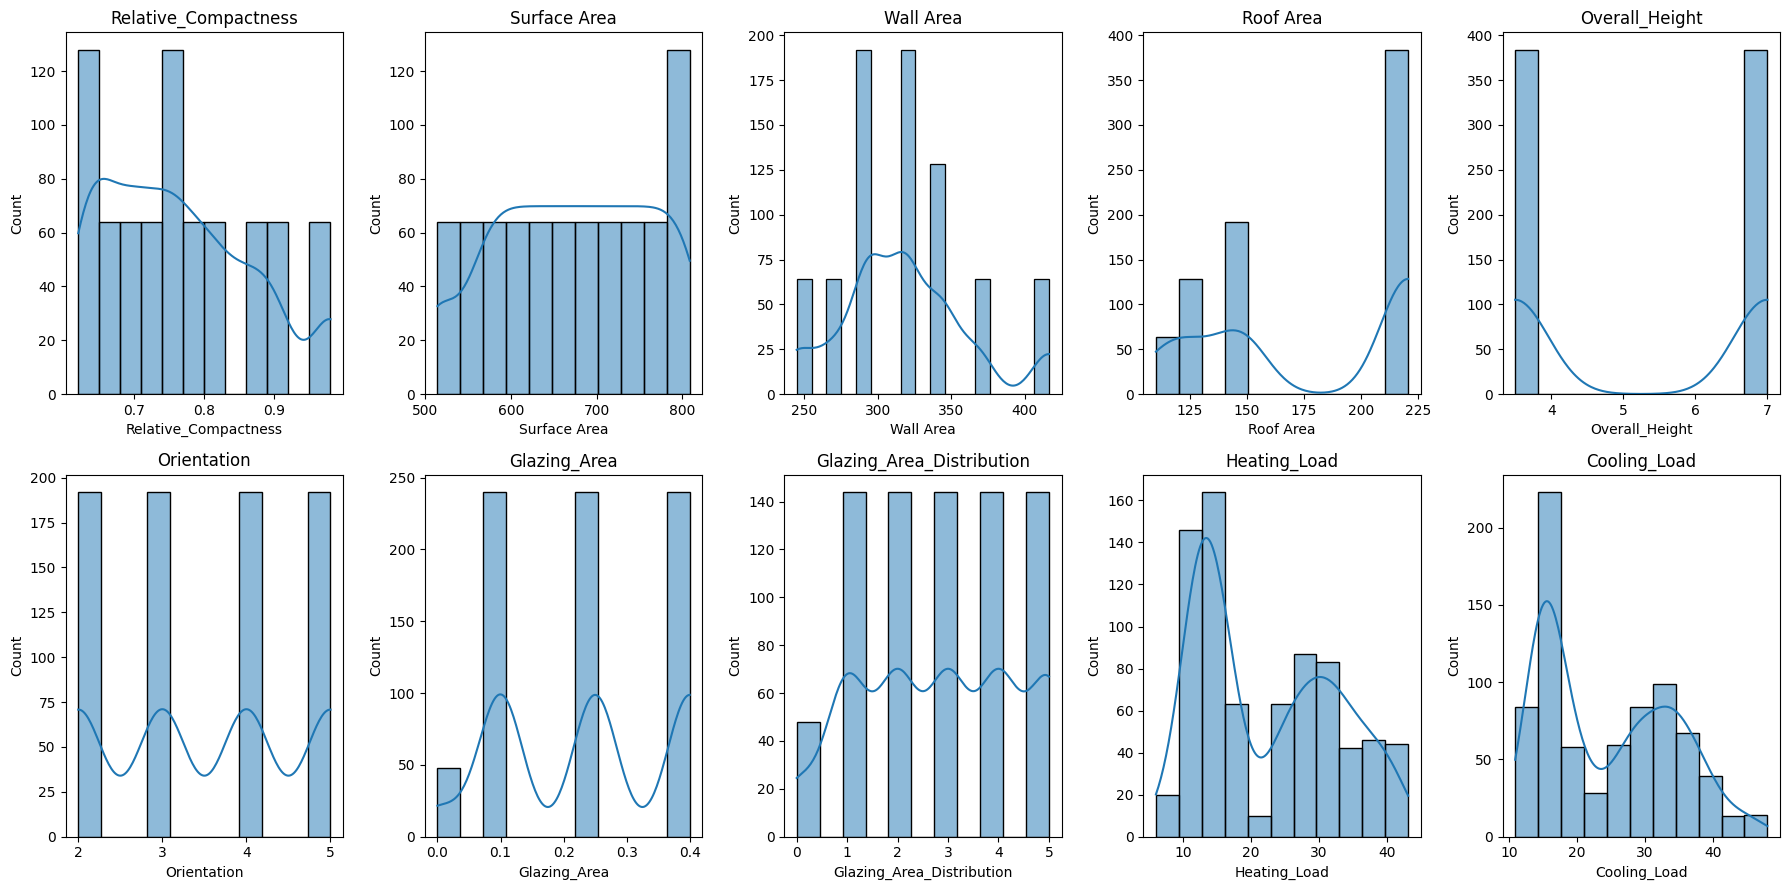

In [8]:
## ploting histplot:

num_rows = 2
num_cols = 5

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

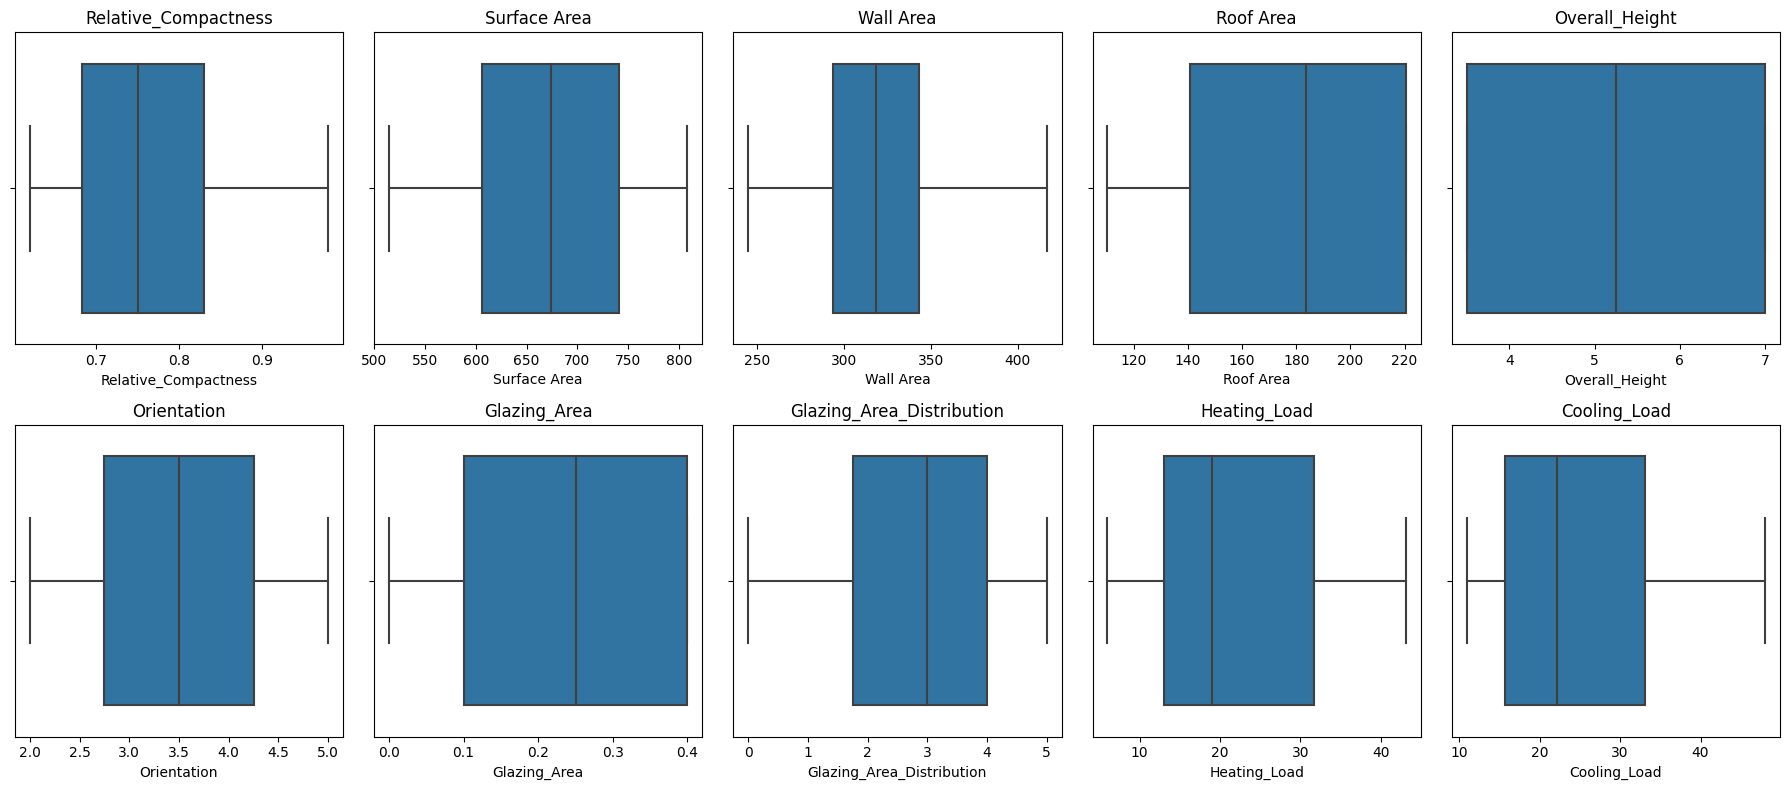

In [9]:
num_rows = 2
num_cols = 5

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(data.columns):
    sns.boxplot(data=data,x = col,ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [10]:
## spliting data into features and target values:
x = data.drop(columns = ["Cooling_Load",'Heating_Load'],axis =1)
yh = data["Heating_Load"]
yc = data['Cooling_Load']
print(f"shape of feature dataset:{x.shape}")
print(f"shape of target_cool dataset:{yc.shape}")
print(f"shape of target_heat dataset:{yh.shape}")

shape of feature dataset:(768, 8)
shape of target_cool dataset:(768,)
shape of target_heat dataset:(768,)


NOTE:

We can predict only one target but will will predict both one by one

In [11]:
## train test split for traget cooling
from sklearn.model_selection import train_test_split

x_train, x_test_C, y_train, y_test_C = train_test_split(x,yc, test_size = 0.2, random_state = 42)

print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test_C.shape, x_test_C.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test_C.shape, x_test_C.ndim))

shape of x_train(614, 8) and have dimension: 2
shape of y_train(614,) and have dimension: 1
shape of x_test(154, 8)  and have dimension: 2
shape of y_test(154,) and have dimension: 2


In [12]:
## train test split for traget heating
from sklearn.model_selection import train_test_split

x_train, x_test_H, y_train, y_test_H = train_test_split(x,yh, test_size = 0.2, random_state = 42)

print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test_H.shape, x_test_H.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test_H.shape, x_test_H.ndim))

shape of x_train(614, 8) and have dimension: 2
shape of y_train(614,) and have dimension: 1
shape of x_test(154, 8)  and have dimension: 2
shape of y_test(154,) and have dimension: 2


In [ ]:
'''
from sklearn.model_selection import GridSearchCV
## setting parameters:
# Define the hyperparameter grid
param_grid = {"criterion" : ['squared_error','absolute_error', ],
              "max_depth" : range(5,20,5),
              "min_samples_split" : range(2,10,2),
              "min_samples_leaf" :range(2,10,2),
              "max_features" : ['sqrt']            }



DTR = RandomForestRegressor()
# Create the GridSearchCV object
grid_search = GridSearchCV(DTR, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 2)


## training the model:

trained_model = grid_search.fit(x_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

'''

In [13]:
## setting hyperparameters
parameters = {
    'criterion': 'squared_error',  # Change to 'mse' for Mean Squared Error
    'max_depth': 5,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 100
}


In [14]:
## calling randomforestregressor model:
RFR = RandomForestRegressor(**parameters)
## model training
model_rfr = RFR.fit(x_train, y_train)

## predicting model:
y_pred_c = model_rfr.predict(x_test_C)
y_pred_h = model_rfr.predict(x_test_H)

In [15]:
## compairing the prediction with truth values:
print("y_pred dimensions :",y_pred_c.ndim)
print("y_test dimension :", y_test_C.ndim)


print("y_pred dimensions :",y_pred_h.ndim)
print("y_test dimension :", y_test_H.ndim)

"""
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""

## for cooling target:
## finding margin error
result_cool_difference = []
j=0
for i in y_test_C:
    diff = i - y_pred_c[j]
    result_cool_difference.append(abs(diff))
    j = j+1

## for heating target:
result_heat_difference = []
j = 0
for i in y_test_H:
    diff = i - y_pred_h[j]
    result_heat_difference.append(abs(diff))
    j = j+1





prediction_table = pd.DataFrame({'Actual_target_cool': y_test_C, 'Predict_cool_target' : (np.round(y_pred_c,2)),
                                 'Actual_Heating_Target': y_test_H, 'Predict_heating_target' : (np.round(y_pred_h,2)),
                                 'Target_cooling_absolute_error_margin':(result_cool_difference),
                                 'Target_heating_absolute_error_margin':(result_heat_difference),

                                 })


y_pred dimensions : 1
y_test dimension : 1
y_pred dimensions : 1
y_test dimension : 1


In [16]:
prediction_table.sample(50)

,Actual_target_cool,Predict_cool_target,Actual_Heating_Target,Predict_heating_target,Target_cooling_absolute_error_margin,Target_heating_absolute_error_margin
548,39.55,37.75,40.78,37.75,1.797017,3.027017
706,16.90,13.47,14.53,13.47,3.433034,1.063034
7,29.60,21.57,19.68,21.57,8.034736,1.885264
344,33.37,29.78,29.34,29.78,3.587236,0.442764
720,32.88,30.83,32.84,30.83,2.054572,2.014572
513,14.97,12.66,12.12,12.66,2.309898,0.540102
118,34.17,34.18,33.12,34.18,0.010366,1.060366
728,29.69,30.66,32.31,30.66,0.967535,1.652465
31,11.67,7.25,6.40,7.25,4.421289,0.848711
462,15.20,12.51,12.17,12.51,2.688463,0.341537


### matric for Target cooling load:

In [17]:
## importing performance matrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


## performance matric mean square error:
mse = mse(y_test_C,y_pred_c)
print(f"mean_square_error [Target Cooling Load] : {mse}")


## Root mean squared error:
rmse = np.sqrt(mse)
print(f"Root_mean_squared_error [Target Cooling Load]:{(rmse)}")



## performance matric mean absolute error:
mae = mae(y_test_C, y_pred_c)
rounded_mae = round(mae, 1)
print(f"mean_absolute_error [Target Cooling Load]: {rounded_mae}")


mean_square_error [Target Cooling Load] : 9.878530701161106
Root_mean_squared_error [Target Cooling Load]:3.1430129972943326
mean_absolute_error [Target Cooling Load]: 2.6


In [18]:
# Calculate R-squared
r_squared = r2_score(y_test_C, y_pred_c)

# Calculate Adjusted R-squared
p = 8
n=len(y_test_C)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print(f"R-squared [Target Cooling Load]: {r_squared}")
print(f"Adjusted R-squared [Target Cooling Load]: {np.round(adjusted_r_squared,2)}")

R-squared [Target Cooling Load]: 0.8933863016397778
Adjusted R-squared [Target Cooling Load]: 0.89


### Matric for Target Heating Load:

In [19]:
## importing performance matrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


## performance matric mean square error:
mse = mse(y_test_H, y_pred_h)
print(f"mean_square_error [Target Heating Load]: {mse}")

## Root mean squared error:
rmse = np.sqrt(mse)
print(f"Root_mean_squared_error [Target Heating Load]:{(rmse)}")



## performance matric mean absolute error:
mae = mae(y_test_H,y_pred_h)
rounded_mae = round(mae, 1)
print(f"mean_absolute_error  [Target Heating Load]: {rounded_mae}")


# Calculate R-squared
r_squared = r2_score(y_test_H,y_pred_h)

# Calculate Adjusted R-squared
p = 8
n=len(y_test_C)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print(f"R-squared  [Target Heating Load]: {r_squared}")
print(f"Adjusted R-squared  [Target Heating Load]: {np.round(adjusted_r_squared,2)}")

mean_square_error [Target Heating Load]: 2.1310736147372817
Root_mean_squared_error [Target Heating Load]:1.4598197199439669
mean_absolute_error  [Target Heating Load]: 1.1
R-squared  [Target Heating Load]: 0.979554428388166
Adjusted R-squared  [Target Heating Load]: 0.98
